<a href="https://colab.research.google.com/github/mohamedshouaib/iti/blob/main/Computer_Vision/Day01/Lab01_Filtering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

You should add this link to your google drive. Click the folder. https://drive.google.com/drive/folders/1LnZP-SZVqaAEHKG0G8GQy4ZbMSZZXEef?usp=sharing .In the top right, click Add a shortcut to My Drive.

After finishing the hands on, download your notebook and submit it to the following form: https://docs.google.com/forms/d/e/1FAIpQLSc-b2YBa-nf5ZMcg1KLg_csNuEvWx5cUZ1jCIW8X21r3LZ-gA/viewform?usp=sharing

In [1]:
import urllib.request
urllib.request.urlretrieve("https://raw.githubusercontent.com/mohamedshouaib/iti/refs/heads/main/Computer_Vision/Day01/nemo.jpg", "nemo.jpg")
urllib.request.urlretrieve("https://raw.githubusercontent.com/mohamedshouaib/iti/refs/heads/main/Computer_Vision/Day01/street.jpg", "street.jpg")

('street.jpg', <http.client.HTTPMessage at 0x7c7d380c5f50>)

In [2]:
import numpy as np
import cv2
import matplotlib.pyplot as plt


def apply_filter_on_img(img, kernel, padding=True):
    """
    Applies a convolution filter to an image with optional padding.

    Args:
        img (numpy.ndarray): Input image (2D array for grayscale)
        kernel (list of lists): 2D convolution kernel/filter matrix
        padding (bool): Whether to pad the image (default=True)

    Returns:
        numpy.ndarray: Filtered output image
    """

    # Initialize output image
    out_img = None

    # Calculate offset for kernel centering
    # For 3x3 kernel: offset = 1, 5x5: offset = 2, etc.
    offset = len(kernel) // 2

    # ==============================================
    # PADDING HANDLING
    # ==============================================
    if padding == False:
        # No padding: output will be smaller than input
        out_img = np.zeros((img.shape[0] - (len(kernel)) + 1,
                           img.shape[1] - (len(kernel)) + 1))
    else:
        # With Zero padding: output will be same size as input
        out_img = np.zeros((img.shape[0], img.shape[1]))

        # Create padded version of the image
        padded_img = np.zeros((img.shape[0] + len(kernel) - 1,
                              img.shape[1] + len(kernel) - 1))
        padded_img = np.uint8(padded_img)  # Ensure correct data type

        # Place original image in center of padded array
        padded_img[offset:padded_img.shape[0] - offset,
                  offset:padded_img.shape[1] - offset] = img
        img = padded_img  # Use padded image for processing

    # ==============================================
    # CONVOLUTION OPERATION
    # ==============================================
    # Iterate through each pixel in output image
    for x in range(0, out_img.shape[0]):
        for y in range(0, out_img.shape[1]):
            acc = 0  # Accumulator for weighted sum

            # Apply kernel to current neighborhood
            for a in range(len(kernel)):
                for b in range(len(kernel)):
                    # Calculate positions in input image
                    xn = x + a
                    yn = y + b

                    # Get pixel value and multiply by kernel weight
                    pixel = img[xn, yn]
                    acc += pixel * kernel[a][b]

            # Store result in output image
            out_img[x, y] = acc

    return out_img

In [3]:
def sobel_edge_detection(image, verbose=True):
    """
    Performs Sobel edge detection on an input image.

    Args:
        image (numpy.ndarray): Input grayscale image
        verbose (bool): Whether to display intermediate results

    Returns:
        numpy.ndarray: Normalized gradient magnitude image
    """

    # ==============================================
    # STUDENT TASK 1: Create Sobel X filter
    # Hint: 3x3 kernel for vertical edge detection

    sobelx = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])

    # STUDENT TASK 2: Apply X-direction filter
    # Hint: Use your apply_filter_on_img()
    gx = apply_filter_on_img(image, sobelx)

    # ==============================================
    # STUDENT TASK 3: Create Sobel Y filter
    # Hint: 3x3 kernel for horizontal edge detection

    sobely = np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]])

    # STUDENT TASK 4: Apply Y-direction filter
    gy = apply_filter_on_img(image, sobely)

    # ==============================================
    # Visualization (provided)
    if verbose:
        plt.imshow(gx, cmap='gray')
        plt.title("Vertical Edge (Gx)")
        plt.show()

    if verbose:
        plt.imshow(gy, cmap='gray')
        plt.title("Horizontal Edge (Gy)")
        plt.show()

    # ==============================================
    # STUDENT TASK 5: Calculate gradient magnitude
    gradient_magnitude =  np.sqrt(gx**2 + gy**2)

    # STUDENT TASK 6: Normalize to [0,255] range
    # Hint: Use cv2.normalize() with NORM_MINMAX
    normalized_gradient_magnitude = cv2.normalize(gradient_magnitude, None, 0, 255, cv2.NORM_MINMAX, cv2.CV_8U)

    # ==============================================
    # Visualization (provided)

    if verbose:
        plt.imshow(normalized_gradient_magnitude, cmap='gray')
        plt.title("Gradient Magnitude")
        plt.show()

    return normalized_gradient_magnitude

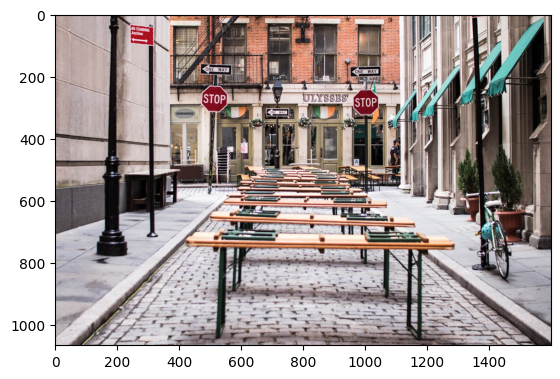

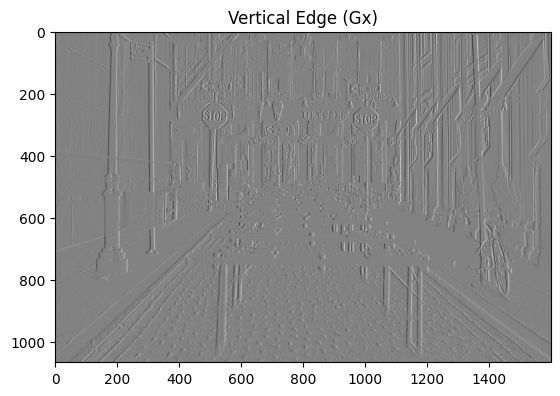

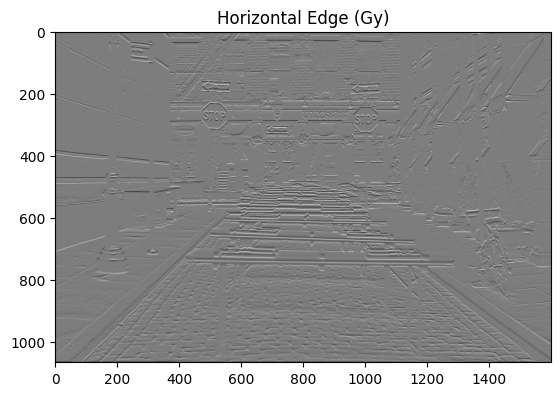

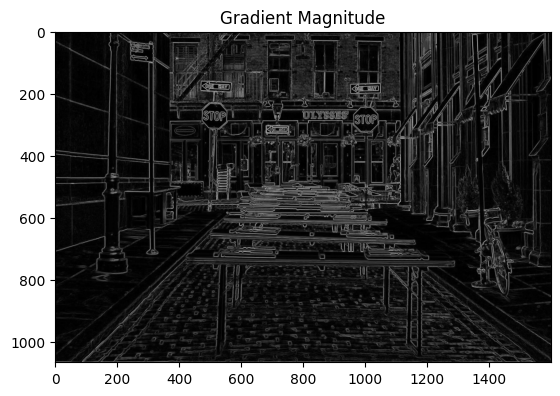

array([[180, 170, 171, ...,  91,  89,  94],
       [170,   4,   1, ...,   9,   2,  87],
       [170,   4,   0, ...,   7,   2,  88],
       ...,
       [221,   6,   7, ...,  24,  24,  64],
       [219,   6,   8, ...,  17,  17,  53],
       [232, 218, 215, ...,  44,  47,  51]], dtype=uint8)

In [4]:
# Student code: read image
street = cv2.imread("street.jpg")

# Student code: convert image from BGR to RGB
street = cv2.cvtColor(street,cv2.COLOR_BGR2RGB)

plt.imshow(street)
plt.show()

# Student code: convert image to grey scale
street = cv2.cvtColor(street, cv2.COLOR_RGB2GRAY)

sobel_edge_detection(street)

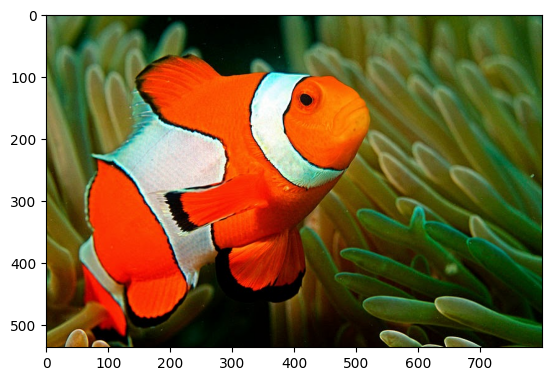

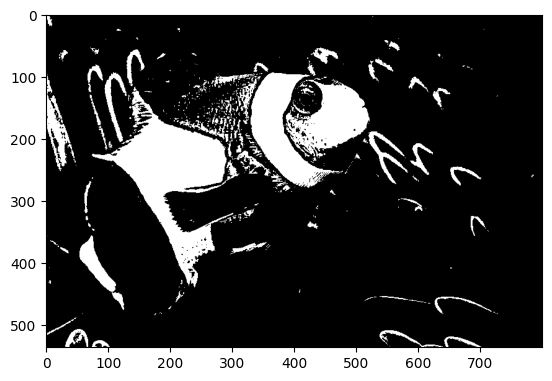

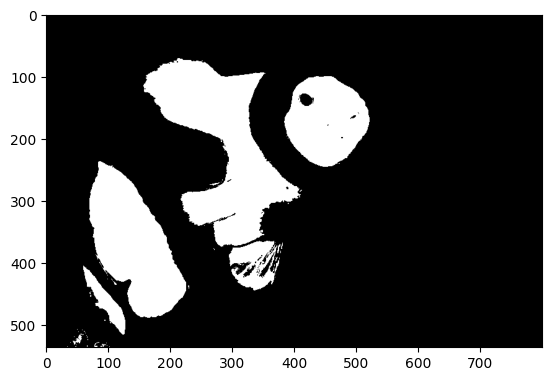

In [5]:
nemo = cv2.imread("nemo.jpg")
nemo = cv2.cvtColor(nemo, cv2.COLOR_BGR2RGB)
plt.imshow(nemo)
plt.show()

# Student Code: convert image to grayscale
GrayNemo = cv2.cvtColor(nemo, cv2.COLOR_RGB2GRAY)

# Student Code: threshold grayscale image
ret, GraythresholdedNemo = cv2.threshold(GrayNemo, 127, 255, cv2.THRESH_BINARY)   #because the object has high intesity than the background

plt.imshow(GraythresholdedNemo,cmap='gray', vmin=0, vmax=255)
plt.show()

# Student Code: Segment Nemo from background in a more effective way using color information
#~ 2 lines of code
lower = np.array([180, 0, 0])
upper = np.array([255, 150, 150])
BetterThresholdedImage = cv2.inRange(nemo, lower, upper)

#End Student Code
plt.imshow(BetterThresholdedImage,cmap='gray', vmin=0, vmax=255)
plt.show()